# Deep Learning: Coursework 2

------------------------------------------------------

**Student Name:** Oliver Wesely (Student Number: 18057603 )

**Start date:** *4th March 2019*

**Due date:** *18th March 2019, 09:00 am*

------------------------------------------------------


## How to Submit

When you have completed the exercises and everything has finished running, click on 'File' in the menu-bar and then 'Download .ipynb'. This file must be submitted to Moodle named as **studentnumber_DL_cw2.ipynb** before the deadline above.

Please produce a **pdf** with all the **results** (tables and plots) as well as the **answers** to the questions below. For this assignment, you don't need to include any of the code in the pdf, but answers to the questions should be self-contained and should not rely on a code reference.  Page limit: 15 pg. 

### IMPORTANT
Please make sure your submission includes **all results/answers/plots/tables** required for grading. We should not have to re-run your code.

## Q1: Memory Mechanisms (30 pts)

Before going deeper into your practical tasks, take some time to revise and make sure you understand recurrent models (Vanilla RNN) and the two of major types of recurrent memory cells you will be using in this assignment: Long-Short Term Memory Units (LSTM) first introduced by Hochreiter and Schmidhuber [1997] and the more recent Gated Recurrent Units (GRU) by Cho et al. [2014].

---------------------------------------------------

### Models
For convenience and to standardize notation please use the following notations:

#### Vanilla RNN Model Eq.

A simple RNN model we will be considering here is given by:

$$h_t = \tanh(W_h [h_{t-1}, x_t] + b_h)$$
$$o_t = \sigma(W_o h_t + b_o)$$

#### LSTM Model Eq.

The LSTM models we will be considering are given by: 
* For the input, forget and outputs gates are: 

$$f_t = \sigma(W_f [h_{t-1}, x_t] + b_f)$$
$$i_t = \sigma(W_i [h_{t-1}, x_t] + b_i)$$
$$o_t = \sigma(W_o [h_{t-1}, x_t] + b_o)$$

* The internal state $c_t$ and hidden state $h_t$ are:

$$c_t = f_t * c_{t-1} +  i_t * \text{tanh}(W_c[h_{t-1}, x_t] + b_c) $$
$$h_t = o_t * \text{tanh}(c_t)$$

#### GRU Model Eq.
The GRU models we will be considering are given by:

* The gates modulation $r_t$, $z_t$:
$$z_t = \sigma(W_z [h_{t-1}, x_t] + b_z)$$
$$r_t = \sigma(W_r [h_{t-1}, x_t] + b_r)$$

* The output and hidden state are now being given by:

$$\tilde{h}_t = \text{tanh}(W_h [(h_{t-1} * r_t), x_t] + b_h)$$
$$h_t = (1 - z_t)*\tilde{h}_t + z_t * h_{t-1}$$

---------------------------------
### Simple Memory Task Description
Consider the following memory task: Given an input sequence of $n$ numbers, we would like a system that, after reading this sequence (one number at a time) will always return the first number in the sequence. That is given an input sequence: $(x_1, x_2, \cdots x_n)$, $x_i \in \mathbb{R}$ the system has to return, at time $t=n$ after 'reading' the last input $x_n$, the first input $x_1$.

---------------------------------

###Questions
Now consider the following questions:

1. Given the task above, consider the above recurrent models (RNNs/LSTMs/GRUs). Which of these arhitectures can (theoretically) perfom the task above? In answering this questions, please consider a simple one-layer model of RNNs/GRU/LSTM with a one-dimensional input $x_t$, a $32$-dim hidden and output layer, followed by a transformation to a one-dimensional final output which should predict $x_0$. \\
Whenever the answer is positive, give the gates' activations and weigths that will produce the desired behaviour. Whenever the answer is no, prove that there exists no such parameters that an arbitrary input sequence can be transformed to produce the first symbol read.  [15 pts]

2. How does the answer change when now the desired output, after reading the whole sequence, is the 3rd input $x_3$ rather than $x_1$? Assume here $n>3$. [5 pts]

3. How does the answer change when you restrict the inputs to be integers between $0$ and $31$ and we consider representing these inputs as a one-hot vectors uniquely representing these numbers? That is: for $x_i=0$, the input of the network would be $\tilde{x}=[1,0,0,
\cdots, 0]$, for $x_i=1$, the input of the network would be $\tilde{x}=[0,1,0,0,\cdots, 0]$ and now predicted output should be $\tilde{x}$. [5 pts]

4. Are GRUs a special case of LSTMs? If so, give the expression of the GRU gates in term of LSTM's gates ($o_t, i_t, f_t$). If not, give a counter-example. This is a general question, not specific to the task above, although you can draw intution from the above questions. Assume here the same input. [5 pts]

**Word limit: ** 1500 words or less





###Question 1. 

* For RNN models we can see that it does not work for every sequence length. Given the above sequence we can see that if we initialise $h_0 = 0, b_h=b_o = 0$ and $W_h=[0_{32\times 1};I_{32}], \; W_o=I_{32}$, where $I_{32}$ is the identity matrix of size 32, that we only can remember $x_1$ if the sequence length is smaller or equal to 32, therefore we assume a length k of the sequence with $n<33$. We also define the activation function as the sigmoid function. 

> At time step $t=1$ we get $h_1=tanh(e_{32}*x_1)$, for $t=2$ $h_2=tanh(tanh(e_{31}*x_1)+e_{32}*x_2)$, $h_3=tanh(tanh(tanh(e_{30}*x_1)+e_{31}*x_2)+e_{32}*x_3)$ and so on, I define $e_t$ as a one hot vector $e_t=(0,...,0,1,0,...,0)^T$ with 1 at the $t^{th}$ value and length 32. Therefore in the final output vector of the RNN the first non-zero value represents input value $x_1$. However, we have to backtransform it specifically using the transformation $x_1=tanh^{-n}(\sigma^{-1}(e_{32-n+1}*o_n))$, where $o_n$ is the output after the last time step n, which pretty much works only in theory, in reality we have to think of computational precision and possible saturation of the output of a recursive tanh.

> For longer sequences we can't remember the first value of the sequence as we are only able to memorize values for a specific time corresponding to the number of hidden states.

* Otherwise we can show that the given GRU architecture can perform the task. To remember the first input, $x_1$, of the sequence we should have a value of the update gate after the first input, $z_1$, close to one and all remaining values of $z$ should be approximately 0:

    \begin{equation}
       z_t \approx \left\{
       \begin{array}
         \lnum{0} & t = 1 \\
         1 & t > 1
       \end{array}
       \right. \implies
        h_t \approx \left\{
       \begin{array}
         \tilde{h_t} & t = 1 \\
         h_{t-1} & t > 1
       \end{array}
       \right.
       \implies
       h_{t}\approx h_{1} \forall t>2
       \implies
       h_{T}\approx h_{1}
    \end{equation}
    
    Therefore we have to show how to get such values of the update gate $z$. Using a sigmoid as an activation function $\implies z_t \in [0,1]$, the weight matrix $W_z=[1_{32\times32};0_{32\times 1}]$, a one matrix,  a $h_0<<0$ a very negative and $b_z$ a very positive vector, but not as positive as $-h_0$, so that $0<<b_z<<-h_0$. Then in $t=1$ we would get a very negative vector in the activation function which would result in zeros as the final values. As $h_t$ will be something in the interval $[-1,1]$ as we apply tanh() after the first input we can see that the value of z will be 1 for $t>2$. I also set the remaining gate to be 1 for all the time steps: $r_t=1$, which will be the case if $W_r=(0)_{33\times32}$ and $b_r>>0$ so that for all time steps the activation function, for examle the  sigmoid, will be applied to a very positive number. Finally we have $h_T=h_1=\tilde{h_1}=tanh(W_h [(h_{0} * r_1), x_1] + b_h)$ so we want to get $x_1$ within the tanh function in the first step, so we can use a weight matrix $W_h=[0_{32\times32};1_{32\times1}]$ and $b_h=0_{32\times1}$, which implies that $\tilde{h_1}=tanh(x_1)_{32\times1}$. To get $x_1$ we then apply the $tanh^{-1}$ to $h_T$ and take the mean of the vector as a transformation.

* The reasoning for LSTM is similar as for GRU and I use the same idea as I did for GRUs: 

     Set $h_0<<0, W_f=[1_{32\times 32};0_{32 \times 1}], b_f>>0$ so that $0<<b_f<< -h_0$ and assume a sigmoid activation function in each gate.


\begin{equation}
      \implies f_t \approx \left\{
       \begin{array}
         \lnum{0} & t = 1 \\
         1 & t > 1
       \end{array}
       \right.
\end{equation}

  > Then we assume $W_i=[(-1)_{32\times 32};0_{32\times 1}]$ and $b_i<<0$ so that $h_0<<b_i<<0$
   
 \begin{equation}
      \implies i_t \approx \left\{
       \begin{array}
         $1 & t = 1 \\
        0 & t > 1
       \end{array}
       \right.
\end{equation}

 >  And we assume $W_o=(0)_{32\times 33}$ and $b_o>>0 \implies o_t \approx 1 \forall t$. Then  we have to set $W_c=[0_{32\times 32};1_{1\times 32}]$ and $b_c=0$. So that overall $c_1\approx 0*c_0+1*tanh(x_1)$ and $c_t\approx c_1 \forall t>1$
 
 > And the output will then be $h_T=1*tanh(c_T)=tanh(c_1)=tanh(tanh(x_1))$, therefore our final transformation will be the $tanh()^{-1}$ two times and take the mean of the whole vector to get $x_1$.
    
### Question *2*

* Regarding RNNs, we can say the same as in Question 1 so that we only can memorize $x_3$ for 32 time steps, which means that if the sequence is longer than 34 it's not possible to get this output. If we have a sequence smaller than 34 we get $x_3$ as an output with the same idea as in Question 1.
* To show that it works for GRU and LSTM I will explain it using LSTM and then just write down the idea for GRU:


> I use a sigmoid activation function for all gates and $W_f=[C_{32\times 30};[0_{29\times 3},I_3]] \in \mathbb{R}_{32\times 33}, \; h_0=0_{32\times 1}, \; b_f=c_{32 \times 1}$ with $C>>-c>>0, \; C,c \in \mathbb{R}$ 

> $\implies f_t \approx 0 \; \forall t\leq 3, \;f_t \approx 1 \; \forall t>3$

> Similar $W_i=[M_{32\times 30};[0_{29\times 3},I_3]], \; b_i=m_{32 \times 1}$ with $M<<-m<<0, \; M,m \in \mathbb{R}$

> $\implies i_t \approx 1 \; \forall t\leq 3, \; i_t \approx 0 \; \forall t>3$

> Assuming $W_o=0_{32\times 33},b_o>>0 \implies o_t \approx 1 \;\forall t$

> Furthermore we define $W_c=[1_{32 \times 30};[0_{29 \times 3},I_3]], \; b_c=0_{32 \times 1}$

> So that $h_1=1*tanh(c_1)=tanh^2(e_{32}*x_1), \; h_2=tanh^4(e_{31}*x_1)+tanh^2(e_{32}*x_2)$ and $\forall t>3\; h_t=h_3=tanh^6(e_{30}*x_1) + tanh^4(e_{31}*x_2)+tanh^2(e_{32}*x_3)$

> Our final transformation applied to $h_n$ will therefore be $tanh^{-2}(e_{32}*h_n)=x_3$.

* For GRU we again use the sigmoid as the activation function and define $W_z=W_f, \; b_z=b_f$ so that $z_t \approx 0 \; \forall t\leq 3$ and $z_t \approx 1 \; \forall t>3$ and $W_r>>0, \; b_r=0$ so that $\forall t \; r_t \approx 1$. We also define $W_h=W_c, \; b_h=b_c$

> so that $\forall t>3\; h_t=h_3=tanh^3(e_{30}*x_1) + tanh^2(e_{31}*x_2)+tanh(e_{32}*x_3)$ and using a final transformation of $tanh^{-1}(e_{32}*h_n)=x_3$ we will get $x_3$.



###Question 3

* Restricting the input values to integers from 0 to 31 encoded one hot vectors of length 32 we can see that the task even works for an RNN model:
>* Assume $W_o=I_{32}$ an identity matrix of size 32 $, b_o=0$ and sigmoid as the activation function and the argmax as the transformation applying to the output of the RNN
>* Furthermore the weight matrix of the hidden states looks like $W_h=[M*I_{32};m*I_{32}]$ and therefore with a size of $32 \times 64$ and the values of m and M:  $0<<m<<M$. We also assume $h_0=b_h=0$.

>* Using this definitions I show the desired behavior with an example:
>>* Assume a sequence of 3 numbers: (4,0,3) then we would get the following hidden states:



   \begin{array}
         $h_1 & = tanh([M*I_{32};m*I_{32}][0_{32\times 1},e_4]) \\
          & =tanh(m*e_4) = c* e_4 \; , with  \; a \; constant \; c \; close \; to \; 1 \\
          h_2 & = tanh([M*I_{32};m*I_{32}][c*e_4,e_0]) \\
          & = tanh(M*c*e_4 + m*e_0) = d*e_4 + f*e_0\;, with \; d>f \; both \; close \; to \; 1  \\
          h_3 & = tanh([M*I_{32};m*I_{32}][d*e_4+f*e_0,e_3]) \\
          & = tanh(M*(d*e_4 + f*e_0) + m*e_3) = g*e_4 + h*e_0 + i*e_3 \;, with \; g>c>b \; close \; to \; 1
  \end{array}


>>>* Taking the softmax after the final $3^{rd}$ hidden layer we get $softmax(h_3)=e_4=4$.
  
* For LSTM and GRU it can be shown that it works  with the same idea as in Question 1. Instead of using $W_c$ and $W_h$ of these models respectively we use $W_h$ as defined in the RNN solution.


###Question 4

In general we can say that GRU 's are not a special case of LSTM's even if it they look similar. The main difference between LSTM and GRU is that GRU's single gating unit simultaneously controls the forget factor and the decision to update the state unit. A counter example to show that GRU's are not a special case of LSTM's is the following:

Suppose a GRU with the following parameters: $$z_t = r_t = 1 \implies h_t = h_{t-1}$$

Suppose now we set the LSTM gates as of variables of the GRU:

$$ o_t = r_t, \text{ } i_t = 1 - z_t, \text{ }  f_t = z_t $$

Using GRU's parameters as defined above this would imply:

$$o_t = 1,\text{ }  i_t = 0,\text{ } f_t = 1 $$

But then we get the following hidden state in the LSTM:

$$ h_t = \tanh(c_{t}) \neq h_{t-1}$$

Therefore we can say that due to the non-linearlity in the formula of $h_t$ in LSTM it is not a general form of GRU's.




In [0]:
#@title IMPORTS
import tensorflow as tf
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

## Q2: Training Memory Models (33 pts)
Let us now investigate in pratice the above problem. And see how each these models does in learning the simple memory task proposed in Q1. For the purposed of this exercise we consider as inputs sequences of length $n=10$, with every input $x_i \sim \mathcal{N(0,1)}$ drawn (independently) from a unit Gaussian.


1. **[5 pts]** Consider one of the models in **Q1.1** that you now know can represent a solution to our simple memory task. For this model, you know at least one set of weights what should implement exactly the prediction of the first read symbol $x_1$. Implement this model in tensorflow, with the fixed set of weights you previously inferred and show emperically that this indeed solves our task. \\
  i) Report the (empirical) mean-squared error over $300$ randomly generated sequences. \\
  ii) Is this set of weights a fix point for the learning? 

**Answers:**

i) I am using Q1.1 GRU model and you can find the implementation below. I can confirm the prediction of the first symbol with a mean squared error of about $10^{-30}$.

ii) Yes in theory this set of weights can be considered to be a fix point for the learning period, whereas the recursive tanh function and/or sigmoid activation function could saturate the values of the coresponding hidden values or gates.

In [13]:
import tensorflow as tf
class GRU_21(object):
  def __init__(self, input_size, hidden_units):
        self.input_size = input_size
        self.hidden_units = hidden_units
        
        # Weights and Bias for the input tensor
        # Relevance/Reset gate
        self.Wr = tf.zeros(shape= (self.input_size, self.hidden_units), dtype=tf.float64)
        self.Ur = tf.zeros(shape= (self.hidden_units, self.hidden_units), dtype=tf.float64)
        self.br = 500.0 *tf.ones(shape = (self.hidden_units,), dtype=tf.float64)
        
        # Memory gate
        self.Wz = tf.ones(shape=(self.input_size,self.hidden_units), dtype=tf.float64)     
        self.Uz = tf.ones(shape=(self.hidden_units,self.hidden_units), dtype=tf.float64)
        self.bz = 500.0 *tf.ones(shape= (self.hidden_units,), dtype=tf.float64)
              
        # 
        self.Wh = tf.ones(shape=(self.input_size,self.hidden_units), dtype=tf.float64)
        self.Uh = tf.zeros(shape= (self.hidden_units, self.hidden_units), dtype=tf.float64)
        self.bh = tf.zeros(shape= (self.hidden_units,), dtype=tf.float64)
        
        # input
        self.input = tf.placeholder(dtype=tf.float64, shape=(None, None, input_size))
        self.x = tf.transpose(self.input, [1, 0, 2])
        self.h0 = tf.matmul((self.x[0, :, :]) , tf.zeros(dtype=tf.float64, shape=(input_size, hidden_units))) - 5000.0
        
        # output
        self.h_t_trans = tf.scan(self.forward_pass, self.x, initializer=self.h0)
        self.h_t = tf.transpose(self.h_t_trans, [1, 0, 2])

  def forward_pass(self, h0, x):
        # New Memory Gate
        z = tf.sigmoid(tf.matmul(x, self.Wz) + tf.matmul(h0, self.Uz) + self.bz)
        
        # Relevance Gate
        r = tf.sigmoid(tf.matmul(x, self.Wr) + tf.matmul(h0, self.Ur) + self.br)
        
        # Reset Gate
        h_ = tf.tanh(tf.matmul(x, self.Wh) + tf.matmul(tf.multiply(r, h0), self.Uh) + self.bh)
        
        # Current Hidden State
        curr_h = tf.multiply(1.0-z, h_) + tf.multiply(z, h0)
        
        return curr_h
      
      
def prediction(h_t):
  #final transformation
  h_t = tf.transpose(h_t,[1, 0, 2])
  
  #multiply by W is like taking the mean as the hidden size is 32
  W = np.ones((32,1))*(1/32.0) 
  x_pred = tf.math.atanh(tf.matmul(h_t[-1,:,:],W)) 
  return x_pred

def run_GRU(X_test, Y_test):
  batch_size = X_test.shape[0]
  sess = tf.Session()

  # Initialize class
  gru = GRU_21(1,32)

  # Find the prediction after final transformation
  output = prediction(gru.h_t)
  exp_output = tf.placeholder(dtype=tf.float64, shape=(batch_size, 1))

  # SSE
  loss = tf.reduce_sum( tf.pow(output - exp_output, 2)) / float(batch_size)
  test_output= sess.run(output, feed_dict={gru.input: X_test, exp_output: Y_test})
  test_loss = sess.run(loss, feed_dict={gru.input: X_test, exp_output: Y_test})
  
  return test_output,test_loss

from numpy import array, random
import numpy as np

length = 20
seq = random.randn(300,length)
X = seq.reshape(300,length,1) 
y = X[:,0,:]

test_output,test_loss = run_GRU(X, y)
print('mean square error over 300 sequences=',test_loss)

mean square error over 300 sequences= 2.2750943984701754e-30


2. **[10 pts] ** Consider the following models, with standard initializations (tensorflow defaults), except a few bias terms as specified below:
  * MM1: RNN bias term $b_h = 0$
  * MM2: LSTM with $b_f = 1$ 
  * MM3: LSTM with $b_f = 5$
  * MM4: LSTM with $b_f = -2$
  * MM5: GRU with  $b_z = 5$

  Implement each of these models in tensorflow. Given the initialization conditions above, compute and plot the following gradients as a function of time: the gradient of the last hidden unit $h_T$, where $T=n$ which respect to the previous hidden units $h_t$ for $t < T$.

  $$ \left\Vert \frac{\partial h_T}{\partial h_t} \right\Vert_1 = \sum_i \left| \frac{\partial h_T[i]}{\partial h_t} \right|$$  
  and the gradient of the loss which respect to the hidden units over time $h_t$, for $t<T$:
    $$ \left\Vert \frac{\partial Loss}{\partial h_t} \right\Vert_1$$  
where the $Loss$ we are considering here is the mean-squares error: $Loss(\textbf{x}) = (x_1-y_T)^2$ where $y_T$ is the output of the reccurent model at time $T=n$ after reading the last input $x_n$.

  **[3 pts] ** Now consider an additional model:
  * MM0: LSTM with $b_f = 1000$ and $b_c = -50$. 

  Report and plot the same gradients as above. What do you observe? What does this model correspond to? (Hint: How does the information flow when processing a sequence). What will be its behaviour in training?

  **[5 pts] ** Increase the length of the input sequence to $n=25$. How do the above gradients change? (you can see by an argument or by running the experiments and explain what you see). How do you expect the training to progress in all of these models MM0-5?  

**Answers:**

* You can find my implementation below

* Looking at model MM0 we can see that that training is mostly constant over time. Because of $b_f=1000 \implies f_t=1$ and $b_c=-50 \implies c_t \approx 1*c_{t-1}+i_t*(-1)$ the LSTM is remembering the most recent values rather than interpreting incoming information. So there will be no significant gradient with respect to the loss.

* The plot of increasing the input sequence length to be 25 can be found below and we can see that this doesn't really affect the behaviour of the curves. The convergence of the gradients is the same in all models as before and similar to using model MM3 we get for both sequence lenghts an increasing gradient and for model MM0 constant gradients. I expect the training of all these models to approach a good output but model MM0 will be difficult to train since updates are scaled by a constant gradient and MM3 will be even harder as we have increasing gradients.

In [0]:
class RNN(object):
  
  def __init__(self, input_size, hidden_units, bh_init, x):  
    
    self.input_size = input_size
    self.hidden_units = hidden_units
    self.x = x
    self.bhinit = tf.constant(bh_init,shape=[self.hidden_units,1],dtype=tf.float32)
    
    # Weights and Bias for the input tensor
    
      # Hidden gate
    self.Wh = tf.get_variable(name="rnn_Wh",shape=([self.hidden_units,self.hidden_units+1]),initializer=tf.contrib.layers.xavier_initializer())
    self.bh = tf.Variable(self.bhinit)
    
      # Output gate
    self.Wo = tf.get_variable(name="rnn_Wo",shape=([self.hidden_units,self.hidden_units]),initializer=tf.contrib.layers.xavier_initializer())
    self.bo = tf.ones([self.hidden_units, 1])
    
    self.initial_h0 = tf.zeros([self.hidden_units,1])
    
    return
  
  def model(self):
    hidden_list=[]
    prev_hidden=self.initial_h0
    #hidden_list.append(prev_hidden)
    
    for j in range(len(self.x)):
      #New Hidden State
      cur_hid= tf.nn.tanh(tf.matmul(self.Wh,tf.concat([prev_hidden,self.x[j]],axis=0)) + self.bh) 
      
      prev_hidden=cur_hid
      
      #append to lists
      hidden_list.append(cur_hid)
    #output state
    o=tf.nn.sigmoid(tf.matmul(self.Wo,cur_hid)+self.bo)
      
      
    return hidden_list,o 


class LSTM(object):
  
  def __init__(self, input_size, hidden_units, bf_init, x,name, bc_init=0):  
    
    self.input_size = input_size
    self.hidden_units = hidden_units
    self.x = tf.reshape(x,[len(x),1])
    self.bfinit = tf.constant(bf_init,shape=[self.hidden_units,1],dtype=tf.float32)
    
    
    # Weights and Bias for the input tensor
    with tf.variable_scope(name):
      # Input gate (i)
      self.Wi = tf.get_variable("lstm_Wi",shape=([self.hidden_units,self.hidden_units+1]),initializer=tf.contrib.layers.xavier_initializer())
      self.bi = tf.zeros([self.hidden_units,1])

        # Forget gate (f)
      self.Wf = tf.get_variable("lstm_Wf",shape=([self.hidden_units,self.hidden_units+1]),initializer=tf.contrib.layers.xavier_initializer())
      self.bf = tf.Variable(self.bfinit)

        # Output gate (o)
      self.Wo = tf.get_variable("lstm_Wo",shape=([self.hidden_units,self.hidden_units+1]),initializer=tf.contrib.layers.xavier_initializer())
      self.bo = tf.zeros([self.hidden_units,1])


        # New memory cell (c)
      self.Wc = tf.get_variable("lstm_Wc",shape=([self.hidden_units,self.hidden_units+1]),initializer=tf.contrib.layers.xavier_initializer())
      if bc_init==0:
        self.bc = tf.zeros([self.hidden_units,1])
      else:
        self.bc = tf.Variable(tf.constant(bc_init,shape=[self.hidden_units,1],dtype=tf.float32))

    self.initial_c0 = tf.zeros([self.hidden_units,1]) 
    self.initial_h0 = tf.zeros([self.hidden_units,1])
    
    return
  
  def model(self):
    hidden_list=[]
    c_prev=self.initial_c0
    prev_hidden=self.initial_h0
    #hidden_list.append(prev_hidden)
    
    
    for j in range(self.x.shape[0]):
      #Input Gate
      i = tf.nn.sigmoid(tf.matmul(self.Wi,tf.concat([prev_hidden,[self.x[j]]],axis=0)) + self.bi)    

      #Forget Gate
      f = tf.nn.sigmoid(tf.matmul(self.Wf,tf.concat([prev_hidden,[self.x[j]]],axis=0)) + self.bf)  

      #Output Gate
      o = tf.nn.sigmoid(tf.matmul(self.Wo,tf.concat([prev_hidden,[self.x[j]]],axis=0)) + self.bo)    

      #New Memory Cell
      c_= tf.nn.tanh(tf.matmul(self.Wc,tf.concat([prev_hidden,[self.x[j]]],axis=0)) + self.bc) 
  

      #Final Memory cell
      c = tf.multiply(f,c_prev) + tf.multiply(i,c_ )     
      #Current Hidden state
      cur_hid = tf.multiply(o,tf.nn.tanh(c))
      
      c_prev=c
      prev_hidden=cur_hid
      
      #append to lists
      hidden_list.append(c)
      
    return hidden_list,cur_hid
  

class GRU(object):
  
  def __init__(self, input_size, hidden_units, bz_init, x):  
    self.input_size = input_size
    self.hidden_units = hidden_units
    self.x = tf.reshape(x,[len(x),1])
    self.bzinit = tf.constant(bz_init,shape=[1],dtype=tf.float32)
      
    # Weights and Bias for the input tensor
    # Relevance/Reset gate
    
    self.Wr = tf.get_variable(name="gru_Wr",shape=([self.hidden_units,self.hidden_units+1]),initializer=tf.contrib.layers.xavier_initializer())
    self.br = tf.zeros([self.hidden_units,1])
    
    # Memory gate
    self.Wz = tf.get_variable(name="gru_Wz",shape=([self.hidden_units,self.hidden_units+1]),initializer=tf.contrib.layers.xavier_initializer())
    self.bz = tf.Variable(self.bzinit)
    
    self.Wh = tf.get_variable(name="gru_Wh",shape=([self.hidden_units,self.hidden_units+1]),initializer=tf.contrib.layers.xavier_initializer())
    self.bh = tf.zeros([self.hidden_units,1])
    
    self.initial_h0 = tf.zeros([self.hidden_units,1])
    return
  
  def model(self):
    hidden_list=[]
    prev_hidden=self.initial_h0
    #hidden_list.append(prev_hidden)
    
    for j in range(self.x.shape[0]):
      #New Memory Gate
      z = tf.sigmoid(tf.matmul(self.Wz,tf.concat([prev_hidden,[self.x[j]]],axis=0)) + self.bz)    

      #Relevance Gate
      r = tf.sigmoid(tf.matmul(self.Wr,tf.concat([prev_hidden,[self.x[j]]],axis=0)) + self.br)  

      #Reset Gate
      h_= tf.nn.tanh(tf.matmul(self.Wh,tf.concat([tf.multiply(prev_hidden,r),[self.x[j]]],axis=0)) + self.bh) 
  
      #Current Hidden state
      cur_hid = tf.multiply((tf.ones(tf.shape(z))-z),h_)+tf.multiply(z,prev_hidden)
      
      prev_hidden=cur_hid
      
      #append to lists
      hidden_list.append(h_)
      
    return hidden_list,cur_hid

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


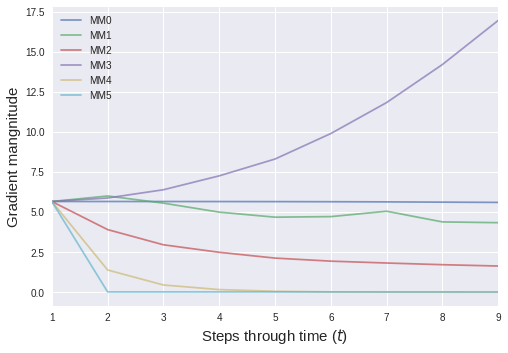

In [10]:
tf.reset_default_graph()

SEQ_LENGTH = 10 #@param
HIDDEN_UNITS = 32 #@param
index_input_to_remember = 0 #@param
derivative = 'losss' #@param

# dummy input sequence
dummy_input = [tf.constant([[np.random.normal()]]) for _ in range(SEQ_LENGTH)] 

rnn_types = {
    'MM0': LSTM(input_size = 1, hidden_units = HIDDEN_UNITS, bf_init = np.float32(1000.0), x = dummy_input,name='0',bc_init=np.float32(-50.0)),
    'MM1': RNN(input_size = 1, hidden_units = HIDDEN_UNITS, bh_init = np.float32(0.0), x = dummy_input),
    'MM2': LSTM(input_size = 1, hidden_units = HIDDEN_UNITS, bf_init = np.float32(1.0), name='1', x = dummy_input),
    'MM3': LSTM(input_size = 1, hidden_units = HIDDEN_UNITS, bf_init = np.float32(5.0), name='2',x = dummy_input),
    'MM4': LSTM(input_size = 1, hidden_units = HIDDEN_UNITS, bf_init = np.float32(-2.0), name='3', x = dummy_input),
    'MM5': GRU(input_size = 1, hidden_units = HIDDEN_UNITS, bz_init = np.float32(5.0), x = dummy_input)
}

depths = {rnn_type: [] for rnn_type in rnn_types} # [9, 8, 7, 6, 5, 4, 3, 2, 1]
grad_norms = {rnn_type: [] for rnn_type in rnn_types}

for rnn_type in rnn_types:

  # --------------------------------------
  # Construct model rnn_types[rnn_type]
  currmodel=rnn_types[rnn_type]

  # --------------------------------------
  # Pass input and unroll in time. 
  # i) Record the intermediate hidden states $h_i$ in rnn_hidden_at_time
  hidden,last_output = currmodel.model()
  rnn_hidden_at_time = hidden
  # ii) Record the last hidden unit and the last output on which we are going to 
  # make the prediction
  last_hidden = hidden[-1]
  hidden_last_output = tf.transpose(last_output)
  
  # Transformation of the RNN output into prediction
  w = tf.Variable(tf.contrib.layers.xavier_initializer()([HIDDEN_UNITS, 1]))
  b = tf.Variable(tf.contrib.layers.xavier_initializer()([1]))
  model_output = tf.matmul(hidden_last_output, w) + b
  
  loss = tf.reduce_mean(
    tf.square(model_output-dummy_input[index_input_to_remember]))

  gradients_at_time = []
  for i in range(1, SEQ_LENGTH):
    if derivative == 'loss':
      current_loss_gradient = tf.gradients(
        loss, 
        rnn_hidden_at_time[i]  
      )
      
    else:
      current_loss_gradient = tf.gradients(
        last_hidden, 
        rnn_hidden_at_time[i],   
      )
    gradients_at_time.append(current_loss_gradient)
  
  
  init = tf.global_variables_initializer()  
  with tf.train.SingularMonitoredSession() as sess:
    sess.run(init)
    gradients = sess.run(gradients_at_time)

  for gid, grad in enumerate(gradients):
    depths[rnn_type].append(len(gradients)-gid)    
    grad_norms[rnn_type].append(np.linalg.norm(grad))

plt.figure()
for rnn_type in depths:
  plt.plot(depths[rnn_type], grad_norms[rnn_type],
           label="%s" % rnn_type, alpha=0.7)
plt.legend()  
plt.ylabel("Gradient mangnitude", fontsize=15)
plt.xlabel("Steps through time ($t$)", fontsize=15)
plt.xlim((1, SEQ_LENGTH-1))
plt.show()

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


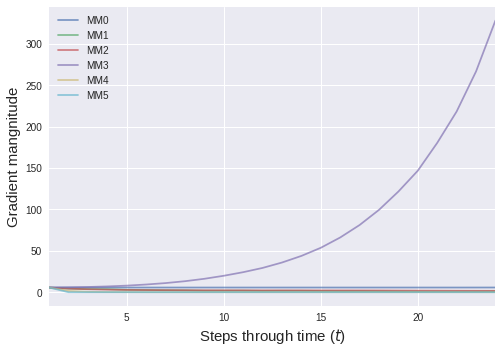

In [11]:
tf.reset_default_graph()

SEQ_LENGTH = 25 #@param
HIDDEN_UNITS = 32 #@param
index_input_to_remember = 0 #@param
derivative = 'losss' #@param

# dummy input sequence
dummy_input = [tf.constant([[np.random.normal()]]) for _ in range(SEQ_LENGTH)] 

rnn_types = {
    'MM0': LSTM(input_size = 1, hidden_units = HIDDEN_UNITS, bf_init = np.float32(1000.0), x = dummy_input,name='0',bc_init=np.float32(-50.0)),
    'MM1': RNN(input_size = 1, hidden_units = HIDDEN_UNITS, bh_init = np.float32(0.0), x = dummy_input),
    'MM2': LSTM(input_size = 1, hidden_units = HIDDEN_UNITS, bf_init = np.float32(1.0), name='1', x = dummy_input),
    'MM3': LSTM(input_size = 1, hidden_units = HIDDEN_UNITS, bf_init = np.float32(5.0), name='2',x = dummy_input),
    'MM4': LSTM(input_size = 1, hidden_units = HIDDEN_UNITS, bf_init = np.float32(-2.0), name='3', x = dummy_input),
    'MM5': GRU(input_size = 1, hidden_units = HIDDEN_UNITS, bz_init = np.float32(5.0), x = dummy_input)
}

depths = {rnn_type: [] for rnn_type in rnn_types} # [9, 8, 7, 6, 5, 4, 3, 2, 1]
grad_norms = {rnn_type: [] for rnn_type in rnn_types}

for rnn_type in rnn_types:

  # --------------------------------------
  # Construct model rnn_types[rnn_type]
  currmodel=rnn_types[rnn_type]

  # --------------------------------------
  # Pass input and unroll in time. 
  # i) Record the intermediate hidden states $h_i$ in rnn_hidden_at_time
  hidden,last_output = currmodel.model()
  rnn_hidden_at_time = hidden
  # ii) Record the last hidden unit and the last output on which we are going to 
  # make the prediction
  last_hidden = hidden[-1]
  hidden_last_output = tf.transpose(last_output)
  
  # Transformation of the RNN output into prediction
  w = tf.Variable(tf.contrib.layers.xavier_initializer()([HIDDEN_UNITS, 1]))
  b = tf.Variable(tf.contrib.layers.xavier_initializer()([1]))
  model_output = tf.matmul(hidden_last_output, w) + b
  
  loss = tf.reduce_mean(
    tf.square(model_output-dummy_input[index_input_to_remember]))

  gradients_at_time = []
  for i in range(1, SEQ_LENGTH):
    if derivative == 'loss':
      current_loss_gradient = tf.gradients(
        loss, 
        rnn_hidden_at_time[i]  
      )
      
    else:
      current_loss_gradient = tf.gradients(
        last_hidden, 
        rnn_hidden_at_time[i],   
      )
    gradients_at_time.append(current_loss_gradient)
  
  
  init = tf.global_variables_initializer()  
  with tf.train.SingularMonitoredSession() as sess:
    sess.run(init)
    gradients = sess.run(gradients_at_time)

  for gid, grad in enumerate(gradients):
    depths[rnn_type].append(len(gradients)-gid)    
    grad_norms[rnn_type].append(np.linalg.norm(grad))

plt.figure()
for rnn_type in depths:
  plt.plot(depths[rnn_type], grad_norms[rnn_type],
           label="%s" % rnn_type, alpha=0.7)
plt.legend()  
plt.ylabel("Gradient mangnitude", fontsize=15)
plt.xlabel("Steps through time ($t$)", fontsize=15)
plt.xlim((1, SEQ_LENGTH-1))
plt.show()

 3. **[10 pts]** Based on the intuitions in the last questions, pick two models (one GRU model, one LSTM model) to train the simple memory task of remembering the first input of a sequence.
   * Explain your choice of models and initializations.
   * Train your models on this task and plot your train and testing loss (mean-sq. error).
   * Report (test) accuracy at end of training.
    * Comment on the results you obtained. What happens if we were to increase $n$? What we happen if we trained longer? What if we were trying to predict the $3rd$ symbol read?

  **Inputs**: $\textbf{x} = (x_1, x_2, ..., x_n)$ where $x_i \sim \mathcal{N(0,1)}$ (independently drawn) \\

  **Output (expected)**: $x_1$

  **Training**: 
    * Data: Generate $32*200$ random sequences of length $n=5$ for training and $256$ ones for testing.  
    * Recommended hyperparameters: learning rate $lr=1e-3$, minibatch size = $32$, optimizer = Adam. (Feel free to manipulate these to get the best performance).
 

**Answers:**

In this point I chose a GRU and LSTM model and initialized my bias vectors to one vectors to certainly not stop models from switching gates. Regarding weights I used standard initialization as I expect the optimizer to converge on them.

At the end of the training I get the following Loss values:
* GRU Training Loss: 0.0003872
* GRU Test Loss:  0.0003338
* LSTM Training Loss: 0.0003190
* LSTM Test Loss:  0.0002528

Comments on the results: The models learned to memorize the desired value. Assuming an increase of n I would expect an increasing training time. Longer training though should give us a smaller loss and better predictions. If we were trying to predict the 3rd symbol the models find a solution as well, whereas now the GRU loss curves look pretty similar, but LSTM models drop to a loss below 0.1 after the 3rd epoch.


In [33]:
n_train = 32*200
train_x = np.random.randn(n_train,5)
test_x = np.random.randn(256,5)


from keras.layers import Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects

def custact(x):
    return tf.math.atanh(x)

get_custom_objects().update({'custom_activation': Activation(custact)})

GRU_23 = tf.keras.models.Sequential()
GRU_23.add(tf.keras.layers.GRU(32, input_shape = (5,1),
    activation='tanh',
    recurrent_activation='sigmoid',
    use_bias=True,
    kernel_initializer='glorot_uniform',
    recurrent_initializer='orthogonal',
    bias_initializer='glorot_uniform',
    implementation=1,
   ))

GRU_23.add(tf.keras.layers.Dense(1,activation=None,use_bias=False))
GRU_23.compile(loss = 'mse', optimizer='adam',metrics=['mse','accuracy'])
GRU_23_fit = GRU_23.fit(np.reshape(train_x,(-1,5,1)),train_x[:,0], validation_data=(np.reshape(test_x,(-1,5,1)),test_x[:,0]),batch_size=32,epochs=20,shuffle=True)

LSTM_23 = tf.keras.models.Sequential()
LSTM_23.add(tf.keras.layers.LSTM(32, input_shape = (5,1),
    activation='tanh',
    recurrent_activation='hard_sigmoid',
    use_bias=True,
    kernel_initializer='glorot_uniform',
    recurrent_initializer='orthogonal',
    bias_initializer='zeros',
    unit_forget_bias=True,
    implementation=1,
   ))
LSTM_23.add(tf.keras.layers.Dense(1,activation=None,use_bias=False))
LSTM_23.compile(loss = 'mse', optimizer='adam',metrics=['mse','accuracy'])
LSTM_23_fit = LSTM_23.fit(np.reshape(train_x,(-1,5,1)),train_x[:,0], validation_data=(np.reshape(test_x,(-1,5,1)),test_x[:,0]),batch_size=32,epochs=20,shuffle=True)



Train on 6400 samples, validate on 256 samples
Epoch 1/20
6400/6400 [==============================] - 5s 817us/sample - loss: 0.5150 - mean_squared_error: 0.5150 - acc: 0.0000e+00 - val_loss: 0.0702 - val_mean_squared_error: 0.0702 - val_acc: 0.0000e+00
Epoch 2/20
6400/6400 [==============================] - 3s 403us/sample - loss: 0.0378 - mean_squared_error: 0.0378 - acc: 0.0000e+00 - val_loss: 0.0171 - val_mean_squared_error: 0.0171 - val_acc: 0.0000e+00
Epoch 3/20
6400/6400 [==============================] - 3s 404us/sample - loss: 0.0122 - mean_squared_error: 0.0122 - acc: 0.0000e+00 - val_loss: 0.0063 - val_mean_squared_error: 0.0063 - val_acc: 0.0000e+00
Epoch 4/20
6400/6400 [==============================] - 3s 406us/sample - loss: 0.0055 - mean_squared_error: 0.0055 - acc: 0.0000e+00 - val_loss: 0.0038 - val_mean_squared_error: 0.0038 - val_acc: 0.0000e+00
Epoch 5/20
6400/6400 [==============================] - 3s 404us/sample - loss: 0.0029 - mean_squared_error: 0.0029 - acc

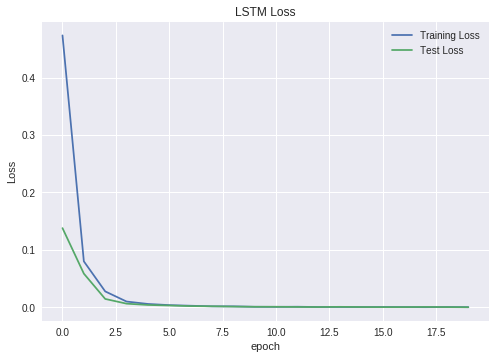

LSTM Train Loss at the end of the training is:  0.00031908463352010586
LSTM Test Loss at the end of the training is:  0.0002528442996663216


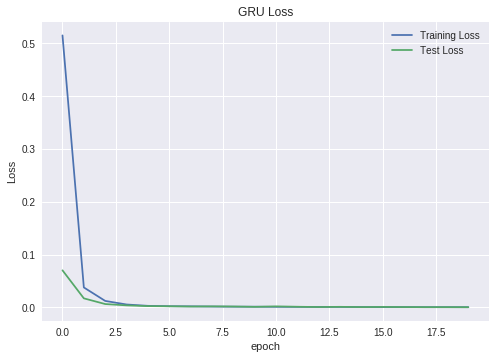

GRU Train Loss at the end of the training is:  0.00038723219540770515
GRU Test Loss at the end of the training is:  0.0003338312071718974


In [34]:
  #LSTM Plot:
  plt.plot(LSTM_23_fit.history['loss'])
  plt.plot(LSTM_23_fit.history['val_loss'])
  plt.title('LSTM Loss')
  plt.ylabel('Loss')
  plt.xlabel('epoch')
  plt.legend(['Training Loss','Test Loss'], loc='upper right')
  plt.show()
  #get accuracy at end of training:
  print("LSTM Train Loss at the end of the training is: ",LSTM_23_fit.history['loss'][-1])
  print("LSTM Test Loss at the end of the training is: ",LSTM_23_fit.history['val_loss'][-1])
  
  
  #GRU Plot:
  plt.plot(GRU_23_fit.history['loss'])
  plt.plot(GRU_23_fit.history['val_loss'])
  plt.title('GRU Loss')
  plt.ylabel('Loss')
  plt.xlabel('epoch')
  plt.legend(['Training Loss', 'Test Loss'], loc='upper right')
  plt.show()
  print("GRU Train Loss at the end of the training is: ",GRU_23_fit.history['loss'][-1])
  print("GRU Test Loss at the end of the training is: ",GRU_23_fit.history['val_loss'][-1])
  

## Q3: Meta-learning via LSTM-s (37 pts)
(Credits to Pedro Ortega for insipring the task and insights behind it)

### Task Description

Consider the following generative model: 
* We have $4$ symbols that will be generates from a multinomial/categorical distribution, with parameters $\textbf{p}=(p_1, p_2, p_3)$: symbol 1 is generated with probability $p_1$, symbol 2 is generated with probability $p_2$, symbol 3 with probability $p_3$.
$$X \sim Categorical(3, \textbf{p})$$

* The parameter vector $\textbf{p}$ is drawn from a Dirichlet prior: $$\textbf{p} \sim Dirichlet(\alpha)$$

We are going to use the above to generate sequences (a continuous stream of data/observations), in the following way:
* Step 1: We sample $\textbf{p}$ from the prior
* Step 2: Given this $\textbf{p}$, for $T-1$ time-steps we will generate i.i.d observations by sampling one of the $4$ symbols from the categorical distribution induced by $\textbf{p}$
$$ (X_1, X_2, \cdots X_{T-1}) , s.t. X_i \sim Categorical(3, \textbf{p})$$
* Step 3: At the end of the sequence we append a fourth symbol (RESET): $(X_1, X_2, \cdots X_T, RESET)$
* Step 4: Return to Step 1 and resample $\textbf{p}$. 
* Repeat this 'forever'.

This will give rise to a continuous stream of data, of the form: $ x_1, x_2, \cdots x_{T-1}, RESET, x_{T+1}, x_{T+2}, \cdots x_{2T}, RESET, \cdots, x_{kT+1}, x_{kT+2}, \cdots x_{(k+1)T}, RESET, \cdots$.

Note: Data generation is provided for you in the cell below. (You just need to call the minibatch function to get a sequence of this form).

### Model

We are going to consider an simple LSTM (32 units hidden state) and present this (generated) sequence of data as an input. At each time step $t$ the LSTM will receive one bit of information (gets to observe the symbol corresponding to this time step) and needs to output the probability distribution for the next symbol. Thus, at time $t$ the LSTM get as input the symbol $x_t$ and will return a probability over the next state $P(x_{t+1}| x_{t}, LSTM_{t-1})$.


### Questions

1) **Without running any experiments (5 pts)**, try to think about the following scenarios and answer these questions: 
* Consider we generate the data with $Dirichlet(\alpha)$, where $\alpha = (10.,10.,1.,)$. What do you think the LSTM model will learn, if anything? Remember we are effectively changing the prediction task, every time we are resampling the probability vector $\textbf{p}$. * Hint: Think about the distribution over $\textbf{p}$ that this prior induces. *  

* What if we consider a more uniformative prior, like $\alpha=(1.1, 1.1, 1.1)$?  



* How does this (learning ability and generalization) depend on the length of the tasks $T$ and the unrolling length on the LSTM? It might be helpful to consider the two extremes: 
i) $T=1$ (we reset the task at every time step). What should the model learn in this case?, ii) $T=\infty$ (we sample the task once and keep it forever). What should the model learn in this case? (Answer this for both previous priors)


* Does this increase or decrease the complexity of the prediction problem? What about the ability to generalize to unseen $\textbf{p}$ ?


####Answers:

* Q1:
 * The LSTM modell wil learn to predict symbol 1 and symbol 2 more often than symbol 3. As of due to the prior distribution of $Dirichlet(\alpha)$ with $\alpha=(10,10,1)$ we can say that we have a higher probability of getting higher p's for the first and for the second symbol.
 
* Q2:
 * As the values of all alphas are the same and low, the likelihood of getting similar probabilities for all three states is high, it would be even higher if the alpha values would be scaled up. But on average the LSTM won't really learning anything but to basically through the dice to forecast the next state.
 
* Q3:
 * The learning ability and generalization depends on T. If consider T=1 we will obtain new samples of our prior after every time step, so there will be no learning affect about the Categorical as it will change all the time but the LSTM will learn the Dirichlet and therefore will be able to predict p values better. For the other extreme value of $T=\infty$ the model would have infinite sequences from one $\alpha$ only and will learn the underlying categorical distribution very good altough it might tend to overfit. The model in the first example with two $\alpha$ values being equal and one different will be learned as of the first and second symbol will highly more likely than the third using T=1 and for the other it will only learn that all symbols have a uniform distribution. In the case of $T=\infty$ the learning outcome really depends on the sample p of the prior but after that it will learn this categorical distribution.
 
* Q4:
 * We expect a complexity decrease as we provide information about the occurence of a sequence and the LSTM don't has to relearn a sequence from the beginning. Unseen p's can't be really generalised that well since we assume that we know what it was and is fixed.





2) **Time to check your intuitions (8 pts)** 

Implement a simple LSTM model of $32$ hidden units. This will take as input a one-hot description of the obsevation ($[1,0,0,0]$ for symbol 1. $[0,1,0,0]$ for symbol 2, $[0,0,1,0]$ for symbol 3, $[0,0,0,1]$ for the RESET symbol). This input is fed into the 32-unit LSTM and the LSTM output is processed as follows: $\textrm{Relu} \Rightarrow \textrm{Fully connected Linear Layer }\Rightarrow \textrm{Relu} \Rightarrow \textrm{Fully connected Linear Layer} \Rightarrow \textrm{Output}$ . The model will be trained by cross-entropy on predicting the next symbol -- thus as opposed to the previous task, we have an output of the model at each time step that is trying to predict the next symbol.

Train the following models:
* T = 5, and T=30 with the data generated from a Dirichlet with $\alpha = (1.,10.,1.)$. Unrolling length for the LSTM = 150. Minibatch size = 64. (M1, M2)
* T = 5, and T=30 with the data generated from a Dirichlet with $\alpha = (1.3, 1.3, 1.3)$ Unrolling length for the LSTM = 150. Minibatch size = 64. (M3, M4)

Train the models for $1000$ iterations ($1000$ minibatches). Record the training and testing preformance (every 10-20 iterations). Plot the curves over training time. What do you observe? (Is this a curve smooth? Do any of them plateau?). **[2x4 pts]**


####Answer:

In my observation I can see a similar pattern in the loss funciton of Model 1 and 2. Their loss goes down very fast until they hit a plateu and after 300/400 iterations both go smoothly down a little more. Looking at Model 3 and 4 we see a slightly smoother curve after iteration 80, until there both have a little plateau. What we also can see is that in Model 2 the training data fluctuates more around the testing data then for example in Model 1 where I can't really see any difference at all.

In [0]:
#title Generate data function

n_symbols = 3 #4
def get_data_per_task(number_samples_per_task=10, p=None, alpha=None):
  if p == None:
    # sample task
    if alpha == None:
      p = np.random.dirichlet((1.1, 1.1, 1.1), 1)[0]
    else:
      p = np.random.dirichlet(alpha, 1)[0]
    
  p = np.append(p, [0])
  sample = np.random.multinomial(1, p, size = number_samples_per_task)
  
  sample = np.append(sample,[[0,0,0,1]], axis=0)
  return sample


def get_data(ntasks, nsamples_per_task, p=None, alpha=None):
  sample = []
  for task_id in range(ntasks):
    sample.append(get_data_per_task(number_samples_per_task = nsamples_per_task, p=p, alpha=alpha))
  return np.concatenate(sample)


def get_minibatch(batch_size, ntasks, nsamples_per_task, p=None, alpha=None):
  sample = get_data(batch_size*ntasks, nsamples_per_task, p=p, alpha=alpha)
  return np.reshape(sample, [batch_size, ntasks*(nsamples_per_task+1), n_symbols+1])

Model:  Model1 , n: 30 , T: 5 , alpha: (1.0, 10.0, 1.0)
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Iterations: 0
Iterations: 100
Iterations: 200
Iterations: 300
Iterations: 400
Iterations: 500
Iterations: 600
Iterations: 700
Iterations: 800
Iterations: 900
Model:  Model2 , n: 5 , T: 30 , alpha: (1.0, 10.0, 1.0)
Iterations: 0
Iterations: 100
Iterations: 200
Iterations: 300
Iterations: 400
Iterations: 500
Iterations: 600
Iterations: 700
Iterations: 800
Iterations: 900
Model:  Model3 , n: 30 , T: 5 , alpha: (1.3, 1.3, 1.3)
Iterations: 0
Iterations: 100
Iterations: 200
Iterations: 300
Iterations: 400
Iterations: 500
Iterations: 600
Iterations: 700
Iterations: 800
Iterations: 900
Model:  Model4 , n: 5 , T: 30 , alpha: (1.3, 1.3, 1.3)
Iterations: 0
Iterations: 100
Iterations: 200
Iterations: 300
Iterations: 400
Iterations: 500
Iterations: 600
Iterations: 700
Iterations: 800
Iterations: 900


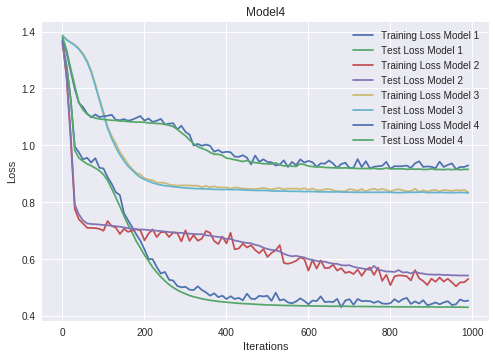

In [40]:
from keras.models import Sequential, Model
from keras.layers import LSTM, Dense, Activation, Flatten
import keras
from keras import backend as K
import numpy as np
import tensorflow as tf
from keras.optimizers import Adam,SGD

Model1 = Sequential()
Model2 = Sequential()
Model3 = Sequential()
Model4 = Sequential()

model_types = {
    'Model1': [Model1 , 30,5,(1.,10.,1.)],
    'Model2': [Model2, 5,30,(1.,10.,1.)],
    'Model3': [Model3, 30,5,(1.3,1.3,1.3)],
    'Model4': [Model4, 5,30,(1.3,1.3,1.3)]
}

train_test_loss={
    'Model1': [[],[]],
    'Model2': [[],[]],
    'Model3': [[],[]],
    'Model4': [[],[]]
}

iterations=1000
iter_save=10

for settings in model_types:
  model, n,T, alpha = model_types[settings]
  print("Model: ",settings,", n:" ,n, ", T:",T,", alpha:",alpha)
  data = []
  for _ in range(iterations):
    data.append(get_minibatch(64, n, T-1, alpha=alpha))

  test_data = get_minibatch(64,n,T-1,alpha=alpha)
  
  model.add(LSTM(32, activation='tanh', return_sequences=True, input_shape = (np.shape(data[0])[1]-1, np.shape(data[0])[2])))
  model.add(Activation('relu'))
  model.add(Dense(units=32,activation='relu'))
  model.add(Dense(units=4,activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-3), metrics=['accuracy'])
    
  for step in range(iterations):
    X_train=data[step]
    x=X_train[:,:-1,:]
    y=X_train[:,1:,:]
    model.fit(x,y, epochs=1, batch_size=64,verbose=0)

    if step % iter_save == 0:
      train_loss = model.evaluate(x,y,verbose=0)[0]
      test_loss = model.evaluate(test_data[:,:-1,:],test_data[:,1:,:],verbose=0)[0]
      train_test_loss[settings][0].append(train_loss)
      train_test_loss[settings][1].append(test_loss)
      if step % 100 == 0:
        print("Iterations:", step)

# Plot
for settings in train_test_loss:
  nIterations = np.array(range(0,iterations,iter_save))
  plt.plot(nIterations, train_test_loss[settings][0])
  plt.plot(nIterations, train_test_loss[settings][1])
  plt.xlabel('Iterations')
  plt.ylabel('Loss')
  plt.title(settings)
  
plt.legend(('Training Loss Model 1','Test Loss Model 1','Training Loss Model 2','Test Loss Model 2','Training Loss Model 3','Test Loss Model 3','Training Loss Model 4','Test Loss Model 4'))
      

3) **Analysis results (10 pts)**

In this section, we will investigate what the models have actaully learnt. For this we will generate a few test sequences:
* *Test sequence 1*: generate a test sequence that changes tasks every T=5 steps from a a Dirichlet with $\alpha = (1.,10.,1.,)$.
* *Test sequence 2*: generate a test sequence that changes tasks every T=5 steps from a a Dirichlet with $\alpha = (1.3,1.3,1.3,)$.
* *Test sequence 3*: generate a test sequence that 'changes tasks' every T=5 steps, but keep sampling according to the same probability vector $\textbf{p}=(0,0,1)$ (You can use any of the extreme here).
* *Test sequence 4*: generate a test sequence that changes tasks every T=5 steps from a a Dirichlet with $\alpha = (0.2,0.2,0.2)$.

i) Test the preformance of M1 and M3 and these test sequences. In addition plot the actual prediction the models do (probability of symbols over time). This should give you more insight in what the model does. Does this correspond or contradict your previous intuitions? **[5 pts]**

ii) Repeat the same procedure for task length $T=30$ and models M2 and M4. What do you observe? How do M2 and M4 compare to each other and how to their compare to M1 and M3 (the models trained on the shorter task length). **[5 pts]**


#### Answer:

i) Regarding Model 1 we can definetly say that the results are align with our intuition for example for sequence 1 and sequence 2 where we predict large probability for symbol 2. In general we can see that especially the Reset symbol will be correctly predicted, which is also the case for Model 3. Whereas Model 3 does not have such a poor generalization as of Model 1 and for example for sequence 2 we see a kind of uniformly looking probability distribution. So we are also align with our intuition

ii) Looking at Model 2 in the output we can see that it's a lot better compared to Model 3 and generalises over all test sequences, especially for symbol 2 it has a high probability for test sequence 1. Whereas Model 4 is very bady in generalising for sequence 1 at the end of T, which also can be seen if looking at sequence 2 and 4, but at least the Reset symbol can be predicted pretty well. Comparing all models we can say that we can see some similarities but also differences between them. Overall the performance is similar and intuins have been fulfilled.

In [0]:
def plot_seq(tests1,tests2,tests3,tests4, model, index):
  fig = plt.figure(figsize=(25, 10))

  plt.subplot(221)
  plt.plot(np.arange(index), tests1[0,:index,0], 'red')
  plt.plot(np.arange(index), tests1[0,:index,1], 'green')
  plt.plot(np.arange(index), tests1[0,:index,2], 'blue')
  plt.plot(np.arange(index), tests1[0,:index,3], 'yellow')
  plt.xlabel('Iterations')
  plt.ylabel('Probability')
  plt.title('Model %s Sequence 1'%model)
  plt.legend(("Symbol 1","Symbol 2","Symbol 3","Reset"), loc = 'center left', bbox_to_anchor=(1,0.5))

  plt.subplot(222)
  plt.plot(np.arange(index), tests2[0,:index,0], 'red')
  plt.plot(np.arange(index), tests2[0,:index,1], 'green')
  plt.plot(np.arange(index), tests2[0,:index,2], 'blue')
  plt.plot(np.arange(index), tests2[0,:index,3], 'yellow')
  plt.xlabel('Iterations')
  plt.ylabel('Probability')
  plt.title('Model %s Sequence 2'%model)
  plt.legend(("Symbol 1","Symbol 2","Symbol 3","Reset"), loc = 'center left', bbox_to_anchor=(1,0.5))
  
  plt.subplot(223)
  plt.plot(np.arange(index), tests3[0,:index,0], 'red')
  plt.plot(np.arange(index), tests3[0,:index,1], 'green')
  plt.plot(np.arange(index), tests3[0,:index,2], 'blue')
  plt.plot(np.arange(index), tests3[0,:index,3], 'yellow')
  plt.xlabel('Iterations')
  plt.ylabel('Probability')
  plt.title('Model %s Sequence 3'%model)
  plt.legend(("Symbol 1","Symbol 2","Symbol 3","Reset"), loc = 'center left', bbox_to_anchor=(1,0.5))
  
  plt.subplot(224)
  plt.plot(np.arange(index), tests4[0,:index,0], 'red')
  plt.plot(np.arange(index), tests4[0,:index,1], 'green')
  plt.plot(np.arange(index), tests4[0,:index,2], 'blue')
  plt.plot(np.arange(index), tests4[0,:index,3], 'yellow')
  plt.xlabel('Iterations')
  plt.ylabel('Probability')
  plt.title('Model %s Sequence 4'%model)
  plt.legend(("Symbol 1","Symbol 2","Symbol 3","Reset"), loc = 'center left', bbox_to_anchor=(1,0.5))
  
  plt.subplots_adjust(wspace = 0.25)

M1 Accuracy on Test Sequence 1: 0.782822996377945
M1 Accuracy on Test Sequence 2: 0.5522231459617615
M1 Accuracy on Test Sequence 3: 0.8120805621147156
M1 Accuracy on Test Sequence 4: 0.720322996377945
M3 Accuracy on Test Sequence 1: 0.782822996377945
M3 Accuracy on Test Sequence 2: 0.5522231459617615
M3 Accuracy on Test Sequence 3: 0.8120805621147156
M3 Accuracy on Test Sequence 4: 0.720322996377945
M2 Accuracy on Test Sequence 1: 0.8395553529262543
M2 Accuracy on Test Sequence 2: 0.347210556268692
M2 Accuracy on Test Sequence 3: 0.02684563770890236
M2 Accuracy on Test Sequence 4: 0.36105285584926605
M4 Accuracy on Test Sequence 1: 0.8228816986083984
M4 Accuracy on Test Sequence 2: 0.5676384270191193
M4 Accuracy on Test Sequence 3: 1.0
M4 Accuracy on Test Sequence 4: 0.80463507771492


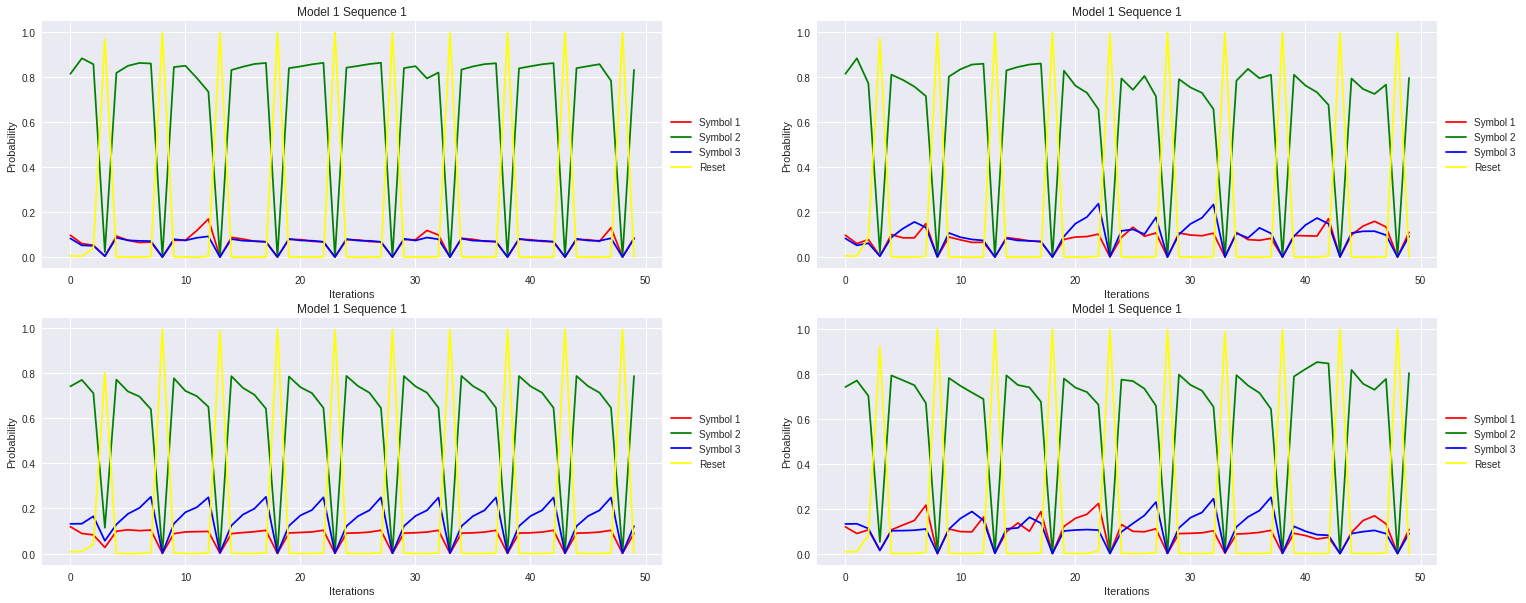

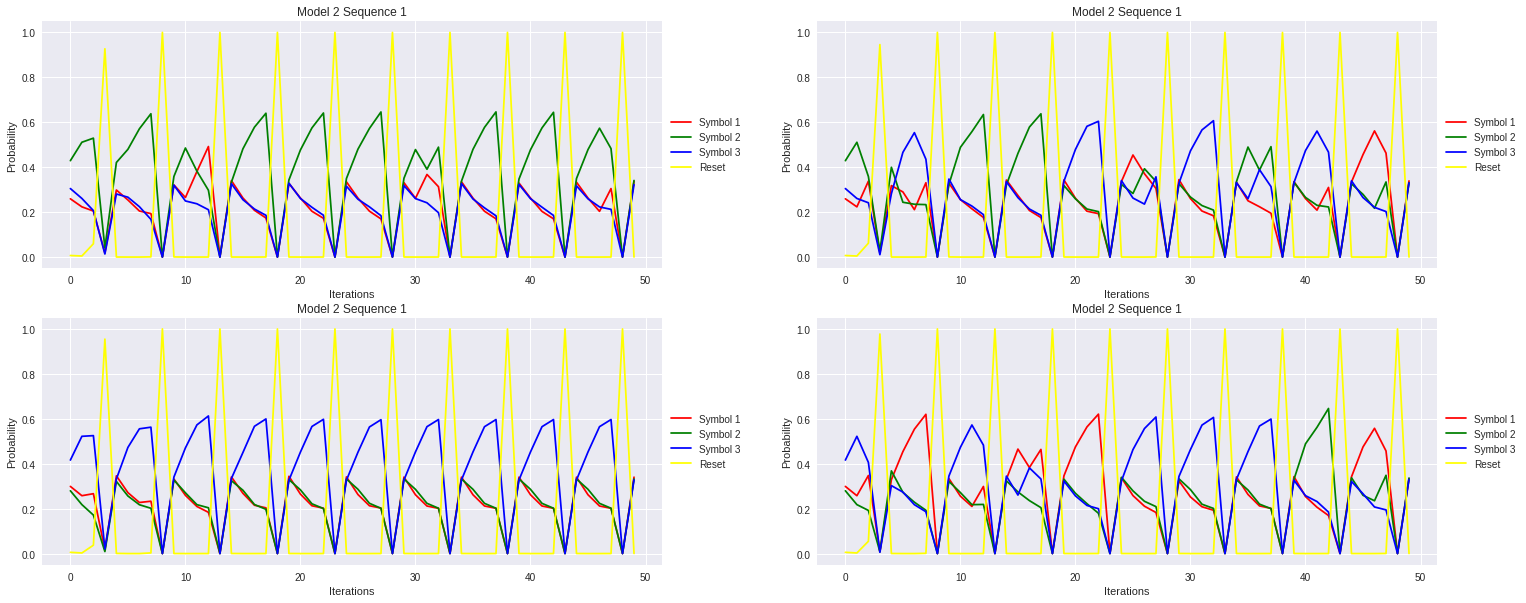

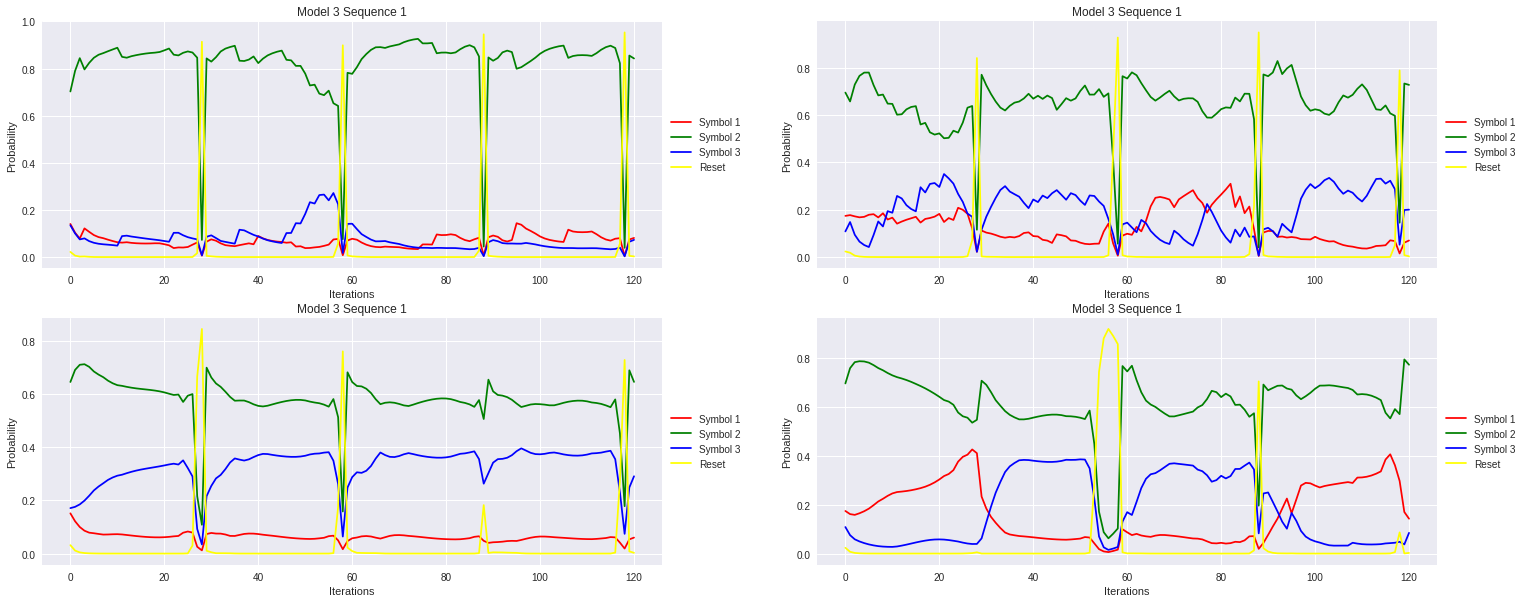

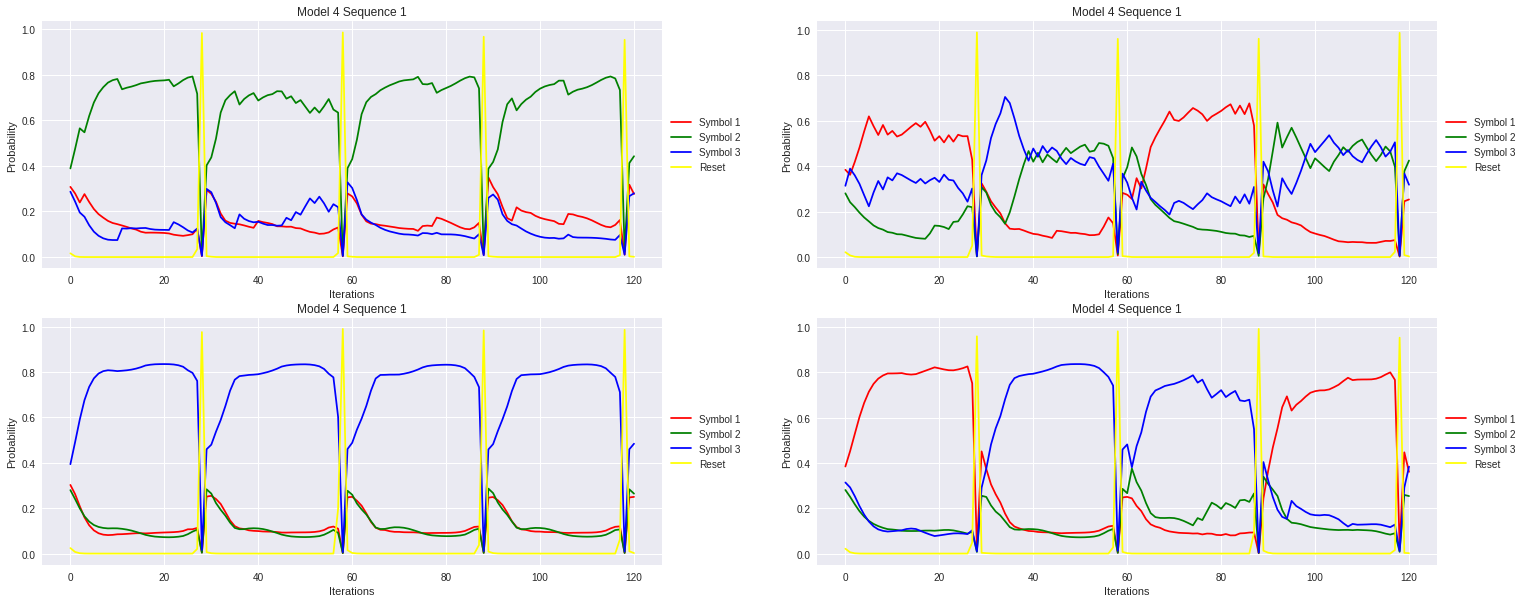

In [66]:
# Generate the test sequences
test_seq_1 = get_minibatch(64, 30, 4, alpha=(1.0,10.0,1.0))
test_seq_2 = get_minibatch(64, 30, 4, alpha=(1.3,1.3,1.3))
test_seq_3 = get_minibatch(64, 30, 4, p=(0,0,1))
test_seq_4 = get_minibatch(64, 30, 4, alpha=(0.2,0.2,0.2))

# Evaluate model 1 and 3 on the test sequences
ev_tseq_1 = Model1.evaluate(test_seq_1[:,:-1,:],test_seq_1[:,1:,:], verbose=0)[1]
ev_tseq_2 = Model1.evaluate(test_seq_2[:,:-1,:], test_seq_2[:,1:,:], verbose=0)[1]
ev_tseq_3 = Model1.evaluate(test_seq_3[:,:-1,:], test_seq_3[:,1:,:], verbose=0)[1]
ev_tseq_4 = Model1.evaluate(test_seq_4[:,:-1,:], test_seq_4[:,1:,:], verbose=0)[1]

eval_ts_1 = Model3.evaluate(test_seq_1[:,:-1,:], test_seq_1[:,1:,:], verbose=0)[1]
eval_ts_2 = Model3.evaluate(test_seq_2[:,:-1,:], test_seq_2[:,1:,:], verbose=0)[1]
eval_ts_3 = Model3.evaluate(test_seq_3[:,:-1,:], test_seq_3[:,1:,:], verbose=0)[1]
eval_ts_4 = Model3.evaluate(test_seq_4[:,:-1,:], test_seq_4[:,1:,:], verbose=0)[1]

# Print Results of model 1 and 3
print("M1 Accuracy on Test Sequence 1:", eval_ts_1)
print("M1 Accuracy on Test Sequence 2:", eval_ts_2)
print("M1 Accuracy on Test Sequence 3:", eval_ts_3)
print("M1 Accuracy on Test Sequence 4:", eval_ts_4)
print("M3 Accuracy on Test Sequence 1:", eval_ts_1)
print("M3 Accuracy on Test Sequence 2:", eval_ts_2)
print("M3 Accuracy on Test Sequence 3:", eval_ts_3)
print("M3 Accuracy on Test Sequence 4:", eval_ts_4)

# Predictions from models 1 and 3
m1_pred_1 = Model1.predict(test_seq_1[:,:-1,:], verbose=0)
m1_pred_2 = Model1.predict(test_seq_2[:,:-1,:], verbose=0)
m1_pred_3 = Model1.predict(test_seq_3[:,:-1,:], verbose=0)
m1_pred_4 = Model1.predict(test_seq_4[:,:-1,:], verbose=0)

m3_pred_1 = Model3.predict(test_seq_1[:,:-1,:], verbose=0)
m3_pred_2 = Model3.predict(test_seq_2[:,:-1,:], verbose=0)
m3_pred_3 = Model3.predict(test_seq_3[:,:-1,:], verbose=0)
m3_pred_4 = Model3.predict(test_seq_4[:,:-1,:], verbose=0)

plot_seq(m1_pred_1,m1_pred_2,m1_pred_3,m1_pred_4, 1, 50)
plot_seq(m3_pred_1,m3_pred_2,m3_pred_3,m3_pred_4, 2, 50)

test_seq_1_2 = get_minibatch(64, 5, 29, alpha=(1.0,10.0,1.0))
test_seq_2_2 = get_minibatch(64, 5, 29, alpha=(1.3,1.3,1.3))
test_seq_3_2 = get_minibatch(64, 5, 29, p=(0,0,1))
test_seq_4_2 = get_minibatch(64, 5, 29, alpha=(0.2,0.2,0.2))

# Evaluate the models on the test sequences
ev_tseq_1_2 = Model2.evaluate(test_seq_1_2[:,:-1,:],test_seq_1_2[:,1:,:], verbose=0)[1]
ev_tseq_2_2 = Model2.evaluate(test_seq_2_2[:,:-1,:], test_seq_2_2[:,1:,:], verbose=0)[1]
ev_tseq_3_2 = Model2.evaluate(test_seq_3_2[:,:-1,:], test_seq_3_2[:,1:,:], verbose=0)[1]
ev_tseq_4_2 = Model2.evaluate(test_seq_4_2[:,:-1,:], test_seq_4_2[:,1:,:], verbose=0)[1]

eval_ts_1_2 = Model4.evaluate(test_seq_1_2[:,:-1,:], test_seq_1_2[:,1:,:], verbose=0)[1]
eval_ts_2_2 = Model4.evaluate(test_seq_2_2[:,:-1,:], test_seq_2_2[:,1:,:], verbose=0)[1]
eval_ts_3_2 = Model4.evaluate(test_seq_3_2[:,:-1,:], test_seq_3_2[:,1:,:], verbose=0)[1]
eval_ts_4_2 = Model4.evaluate(test_seq_4_2[:,:-1,:], test_seq_4_2[:,1:,:], verbose=0)[1]

# Print Results
print("M2 Accuracy on Test Sequence 1:", ev_tseq_1_2)
print("M2 Accuracy on Test Sequence 2:", ev_tseq_2_2)
print("M2 Accuracy on Test Sequence 3:", ev_tseq_3_2)
print("M2 Accuracy on Test Sequence 4:", ev_tseq_4_2)
print("M4 Accuracy on Test Sequence 1:", eval_ts_1_2)
print("M4 Accuracy on Test Sequence 2:", eval_ts_2_2)
print("M4 Accuracy on Test Sequence 3:", eval_ts_3_2)
print("M4 Accuracy on Test Sequence 4:", eval_ts_4_2)

# Predictions from models
m2_pred_1_2 = Model2.predict(test_seq_1_2[:,:-1,:], verbose=0)
m2_pred_2_2 = Model2.predict(test_seq_2_2[:,:-1,:], verbose=0)
m2_eval_ts_3_pred_2 = Model2.predict(test_seq_3_2[:,:-1,:], verbose=0)
m2_pred_4_2 = Model2.predict(test_seq_4_2[:,:-1,:], verbose=0)

m4_pred_1_2 = Model4.predict(test_seq_1_2[:,:-1,:], verbose=0)
m4_pred_2_2 = Model4.predict(test_seq_2_2[:,:-1,:], verbose=0)
m4_pred_3_2 = Model4.predict(test_seq_3_2[:,:-1,:], verbose=0)
m4_pred_4_2 = Model4.predict(test_seq_4_2[:,:-1,:], verbose=0)

plot_seq(m2_pred_1_2, m2_pred_2_2, m2_eval_ts_3_pred_2, m2_pred_4_2, 3, 121)
plot_seq(m4_pred_1_2, m4_pred_2_2, m4_pred_3_2, m4_pred_4_2,  4, 121)


4) **Comparison to the Bayesian update (14 pts)**


Going back to the generative process in the task description. For a given prior, for each the mini-tasks (selecting/sampling a $\textbf{p}$), one could compute the Bayesian posterior at each time step.  We start with a prior and every time we observe a symbol with update our posterior over the parameters
 $\textbf{p}$ given the data. We do this every time step, till we reach the RESET symbol which marks the end of the task. Then we start again, from the prior.
,

i) Derive the posterior update for each time step. (Hint: since the two distribution are conjugates or each other, the posterior has a closed form). **[2 pts]**

ii) Implement this posterior update and use it to infer the probabilities over the next symbol, for the previously generated test sequences. This will tell you, what the inferred probabilities would be, if we knew the structure of the model, the prior and that the reset symbol means the tasks has finished and we should reset our estimate to the prior. (For test sequence 1 and 2, use the prior that generated them, for test sequence 3 and 4 compute the updates starting from both priors) **[5 pts]**

iii) Compare this to what the LSTM predictions are. What do you observe? What are the failure cases -- can you explain why this might happen? (For test sequence 1 and 2, use the prior that generated them, for test sequence 3 and 4 compute the updates starting from both priors). **[7 pts]**
 
For this analysis, only consider $T=30$ and respectively models M2 and M4.


i) By applying a pair of conjugate distributions we can form a closed posterior probability:

> - $f(\theta | D) = Dirichlet(\alpha) \implies f(\theta | D) \propto f(\theta,D)  $ (D.. Dataset)

$$ f(\mathbf{p} | \alpha) \prod_{x_i \in X}^{} f(x_i | \mathbf{p}) \propto \prod_{i=1}^{3}p_i^{\alpha_i-1}\prod_{x_j \in X}\prod_{i=1}^{3}p_i^{\mathbb{{1}\{}x_j = i \}} \text{ where } x_j \in X $$ 

$$ = \prod_{i=1}^{3}p_i^{\alpha_i-1 + \sum_{x_i \in X} {\mathbb{{1}\{}x_j = i \}} } $$

> - Since the Dirichlet is a conjugate prior distribbution of the categorical distribution we get a $Dirichlet(\alpha')$ distribution with 
$ \alpha'_i = \alpha_i + \sum_{x_j \in X} {\mathbb{{1}\{}x_j = i \}}$


>- Therefore the posterior update/predictive is: 

$$ f( X = x | D) = \int f(X = x| \theta)f(\theta|D)d\theta = \int f(X = x| \mathbf{p})f(\mathbf{p} | D) d\mathbf{p}  = \int p_x \frac{\Gamma(\sum_{j=1}^{3}\alpha'_j )}{\prod_{j=1}^{3}\Gamma(\alpha'_j)}\prod_{j=1}^{3}p_j^{{\mathbb{1} \{} x=j \} + \alpha'_j -1} d\mathbf{p} = \frac{\Gamma(\sum_{j=1}^{3}\alpha'_j )}{\prod_{j=1}^{3}\Gamma(\alpha'_j)} \int \prod_{j=1}^{3}p_j^{{\mathbb{1} \{} x=j \} + \alpha'_j -1}d\mathbf{p} = \frac{\Gamma(\sum_{j=1}^{3}\alpha'_j )}{\prod_{j=1}^{3}\Gamma(\alpha'_j)} \frac{\prod_{j=1}^{3}\Gamma({\mathbb{1} \{} x=j \} + \alpha'_j )}{\Gamma(1 + \sum_{j=1}^{3}\alpha'_j)} 
= \frac{\alpha'_{x}}{\sum_{j=1}^{3}\alpha'_j}$$


ii) The implementation can be found below


iii) In the output of test sequence 1 we can see high posterior updates whereas we get similar results as without updates. As of implementig the prior we can see in test sequence 2 some sort of dependence between observations. And as of the prior has a different form the variance between resets change. If we look at the reset of test sequence 3 with $\alpha=(1,10,1)$  the trend of every reset is similar. Additionally a high starting probability of symbol 2 which goes down until the next reset and a much smoother function compared to the implementation without the update. Looking at the plot of test sequence 3 with the other $\alpha$ the model can predict symbol 3 very well and due to a uniform prior we start with weigh lower probabilities for symbol 2. Finally looking at test sequence 4, first the one with $\alpha=(1,10,1)$ we can see a high similarity to Model 4 looking at the adjustings for example. The one with the other $\alpha$ - sequence 4 - is a little bit smoother though.




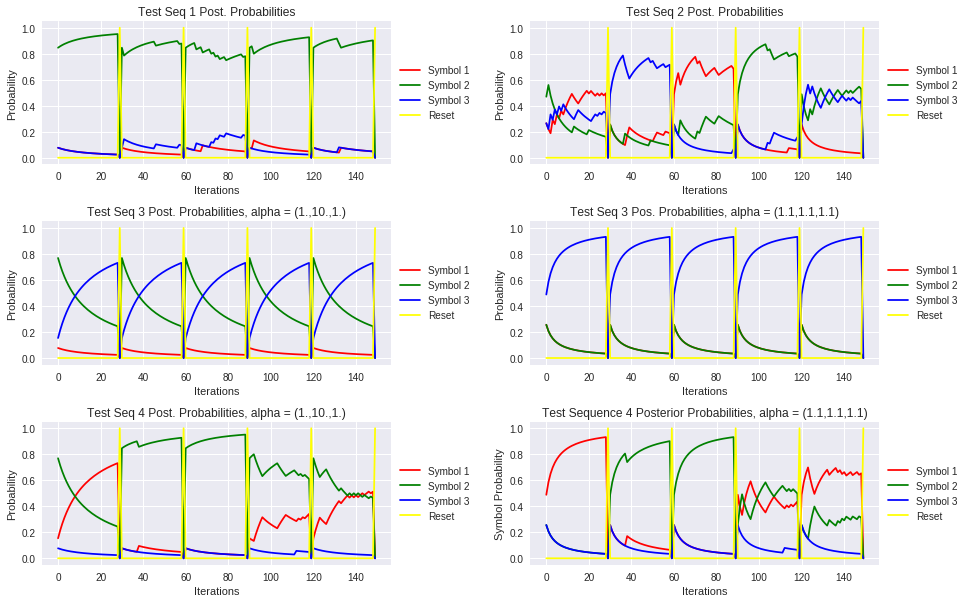

In [65]:
# Test seq1
alpha = [1., 10., 1.]
pp_ts1 = np.zeros((150,4))
for index in range(150):
  symbol = test_seq_1_2[0,index,:]
  argmax = np.argmax(symbol)
  if argmax == 3:
    alpha = [1., 10., 1.]
    pp_ts1[index,3] = 1
  else:
    alpha[argmax] += 1
    pp_ts1[index,:3] = alpha / np.sum(alpha)
    
plt.figure(figsize=(15, 10))
plt.subplot(321)  
plt.plot(np.arange(150),pp_ts1[:,0],'red')
plt.plot(np.arange(150),pp_ts1[:,1],'green')
plt.plot(np.arange(150),pp_ts1[:,2],'blue')
plt.plot(np.arange(150),pp_ts1[:,3],'yellow')
plt.legend(["Symbol 1","Symbol 2","Symbol 3","Reset"], loc='center left', bbox_to_anchor=(1,0.5))
plt.xlabel('Iterations')
plt.ylabel('Probability')
plt.title('Test Seq 1 Post. Probabilities')





# Test seq 2
alpha = [1.3, 1.3, 1.3]
pp_ts2 = np.zeros((150,4))
for index in range(150):
  symbol = test_seq_2_2[0,index,:]
  argmax = np.argmax(symbol)
  if argmax == 3:
    alpha = [1.1, 1.1, 1.1]
    pp_ts2[index,3] = 1
  else:
    alpha[argmax] += 1
    pp_ts2[index,:3] = alpha / np.sum(alpha)
plt.subplot(322)      
plt.plot(np.arange(150),pp_ts2[:,0],'red')
plt.plot(np.arange(150),pp_ts2[:,1],'green')
plt.plot(np.arange(150),pp_ts2[:,2],'blue')
plt.plot(np.arange(150),pp_ts2[:,3],'yellow')
plt.legend(["Symbol 1","Symbol 2","Symbol 3","Reset"], loc='center left', bbox_to_anchor=(1,0.5))
plt.xlabel('Iterations')
plt.ylabel('Probability')
plt.title('Test Seq 2 Post. Probabilities')





# Test seq 3
alpha = [1., 10., 1.]
pp_ts3_1 = np.zeros((150,4))
for index in range(150):
  symbol = test_seq_3_2 [0,index,:]
  argmax = np.argmax(symbol)
  if argmax == 3:
    alpha = [1., 10., 1.]
    pp_ts3_1[index,3] = 1
  else:
    alpha[argmax] += 1
    pp_ts3_1[index,:3] = alpha / np.sum(alpha)
plt.subplot(323)  
plt.plot(np.arange(150),pp_ts3_1[:,0],'red')
plt.plot(np.arange(150),pp_ts3_1[:,1],'green')
plt.plot(np.arange(150),pp_ts3_1[:,2],'blue')
plt.plot(np.arange(150),pp_ts3_1[:,3],'yellow')
plt.legend(["Symbol 1","Symbol 2","Symbol 3","Reset"], loc='center left', bbox_to_anchor=(1,0.5))
plt.xlabel('Iterations')
plt.ylabel('Probability')
plt.title('Test Seq 3 Post. Probabilities, alpha = (1.,10.,1.)')




# Test seq 4
alpha = [1.1, 1.1, 1.1]
pp_ts3_2 = np.zeros((150,4))
for index in range(150):
  symbol = test_seq_3_2 [0,index,:]
  argmax = np.argmax(symbol)
  if argmax == 3:
    alpha = [1.1, 1.1, 1.1]
    pp_ts3_2[index,3] = 1
  else:
    alpha[argmax] += 1 # Posterior update
    pp_ts3_2[index,:3] = alpha / np.sum(alpha)
    
plt.subplot(324)  
plt.plot(np.arange(150),pp_ts3_2[:,0],'red')
plt.plot(np.arange(150),pp_ts3_2[:,1],'green')
plt.plot(np.arange(150),pp_ts3_2[:,2],'blue')
plt.plot(np.arange(150),pp_ts3_2[:,3],'yellow')
plt.legend(["Symbol 1","Symbol 2","Symbol 3","Reset"], loc='center left', bbox_to_anchor=(1,0.5))
plt.xlabel('Iterations')
plt.ylabel('Probability')
plt.title('Test Seq 3 Pos. Probabilities, alpha = (1.1,1.1,1.1)')




# Test seq 4
alpha = [1., 10., 1.]
pp_ts4_1 = np.zeros((150,4))

for index in range(150):
  symbol = test_seq_4_2[0,index,:]
  argmax = np.argmax(symbol)
  if argmax == 3:
    alpha = [1., 10., 1.]
    pp_ts4_1[index,3] = 1
  else:
    alpha[argmax] += 1
    pp_ts4_1[index,:3] = alpha / np.sum(alpha)
plt.subplot(325)  
plt.plot(np.arange(150),pp_ts4_1[:,0],'red')
plt.plot(np.arange(150),pp_ts4_1[:,1],'green')
plt.plot(np.arange(150),pp_ts4_1[:,2],'blue')
plt.plot(np.arange(150),pp_ts4_1[:,3],'yellow')
plt.legend(["Symbol 1","Symbol 2","Symbol 3","Reset"], loc='center left', bbox_to_anchor=(1,0.5))
plt.xlabel('Iterations')
plt.ylabel('Probability')
plt.title('Test Seq 4 Post. Probabilities, alpha = (1.,10.,1.)')





# Test seq 4
alpha = [1.1, 1.1, 1.1]
pp_ts4_2 = np.zeros((150,4))

for index in range(150):
  symbol = test_seq_4_2[0,index,:]
  argmax = np.argmax(symbol)
  if argmax == 3:
    alpha = [1.1, 1.1, 1.1]
    pp_ts4_2[index,3] = 1
  else:
    alpha[argmax] += 1
    pp_ts4_2[index,:3] = alpha / np.sum(alpha)
    
plt.subplot(326)      
plt.plot(np.arange(150),pp_ts4_2[:,0],'red')
plt.plot(np.arange(150),pp_ts4_2[:,1],'green')
plt.plot(np.arange(150),pp_ts4_2[:,2],'blue')
plt.plot(np.arange(150),pp_ts4_2[:,3],'yellow')
plt.legend(["Symbol 1","Symbol 2","Symbol 3","Reset"], loc='center left', bbox_to_anchor=(1,0.5))
plt.xlabel('Iterations')
plt.ylabel('Symbol Probability')
plt.title('Test Sequence 4 Posterior Probabilities, alpha = (1.1,1.1,1.1)')
plt.subplots_adjust(hspace=0.4)
plt.subplots_adjust(wspace=0.4)
